In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
%matplotlib inline

In [ ]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=False)

In [2]:
models = {}

models['mock_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_2'] =  ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.NormMDF([-0.25, 0.2]),
    ppy.dustmodels.LogNormDust([-0.5, 0.1]),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

tau_SFHbins = ppy.agemodels.TauModel(np.array([2.0, 3.0]), iso_step=-1).logSFH

models['mock_7'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.NonParam(tau_SFHbins),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_8'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.agemodels.NonParam(tau_SFHbins),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),  # model SingleFeH with FixedWidthNormMDF
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_2'] = models['mock_3']  # model FixedWidthNormMDF with SingleFeH

models['mismatch_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),  
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),  # model SingleDust (Fdust=0.5) with FixedWidthLogNormDust
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5, dust_frac=0.5),  # model FixedWidthLogNormDust with SingleDust (Fdust=0.5)
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5, dust_frac=1.0),  # model Fdust=0.5 with Fdust=1.0
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(28.0)  # model has wrong distance
)

models['mismatch_7'] = models['mock_3']  # Exposure overestimated in model
models['mismatch_8'] = models['mock_3']  # mock has PSF 10% narrower
models['mismatch_9'] = models['mock_3']  # mock has PSF 10% narrower in F814W

models['mismatch_10'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3, -0.25),  # model sig=0.1 with sig=0.3
    ppy.dustmodels.SingleDust(-0.5),
    ppy.agemodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

In [3]:
run_names = {}
for i in range(1, 9):
    run_names['mock_{:d}'.format(i)] = 'Mock Test {:d}'.format(i)
run_names['mismatch_1'] = 'Model: MDF, Truth: Single [Fe/H]'
run_names['mismatch_2'] = 'Model: Single [Fe/H], Truth: MDF'

run_names['mismatch_3'] = 'Model: LogNorm Dust, Truth: Single Dust'
run_names['mismatch_4'] = 'Model: Single Dust, Truth: LogNorm Dust'
run_names['mismatch_5'] = 'Model: DustFrac = 1, Truth: DustFrac = 0.5'

run_names['mismatch_6'] = 'Model: Dmod=28, Truth: Dmod=26'
run_names['mismatch_7'] = 'Model: Overestimates Exposure Time by 5x'

run_names['mismatch_8'] = 'Model: Overestimates PSF width by 10%'
run_names['mismatch_9'] = 'Model: Overestimates F814W PSF width by 10%'

run_names['mismatch_10'] = 'Model: Overestimates MDF width (0.3 vs 0.1)'

In [4]:
models.keys()

dict_keys(['mock_1', 'mock_2', 'mock_3', 'mock_4', 'mock_5', 'mock_6', 'mock_7', 'mock_8', 'mismatch_1', 'mismatch_2', 'mismatch_3', 'mismatch_4', 'mismatch_5', 'mismatch_6', 'mismatch_7', 'mismatch_8', 'mismatch_9', 'mismatch_10'])

In [5]:
res = {}
for k in models.keys():
    try:
        res[k] = ppy.results.ResultsPlotter('results/paper1_{:s}.csv'.format(k), true_model=models[k], run_name=run_names[k])
    except:
        if k != 'mock_6':
            assert False

In [12]:
def plot_sets(run_names, chains_only=False, dmod_true=24.42, nonparam=False):
    nr = np.max([models[k]._num_params for k in run_names])
    if np.any([isinstance(models[k].age_model, ppy.agemodels.NonParam) for k in run_names]):
        nr += 1  # for Npix
    if not chains_only:
        nr += 3
    nx = len(run_names)
    fs = (5+3*nx, 2*nr)
    fig, axes = plt.subplots(ncols=nx, nrows=nr, figsize=fs, sharex=True, sharey='row')
    if nx == 1:
        axes = [axes]
    for i, n in enumerate(run_names):
        results = res[n]
        plot_axes = list(axes[:, i])
        if models[n].p_distance == 0:
            plot_axes.pop(models[n].p_total)
        results.plot_chains(axes=plot_axes, chains_only=chains_only)
    plt.tight_layout()
    return fig, axes

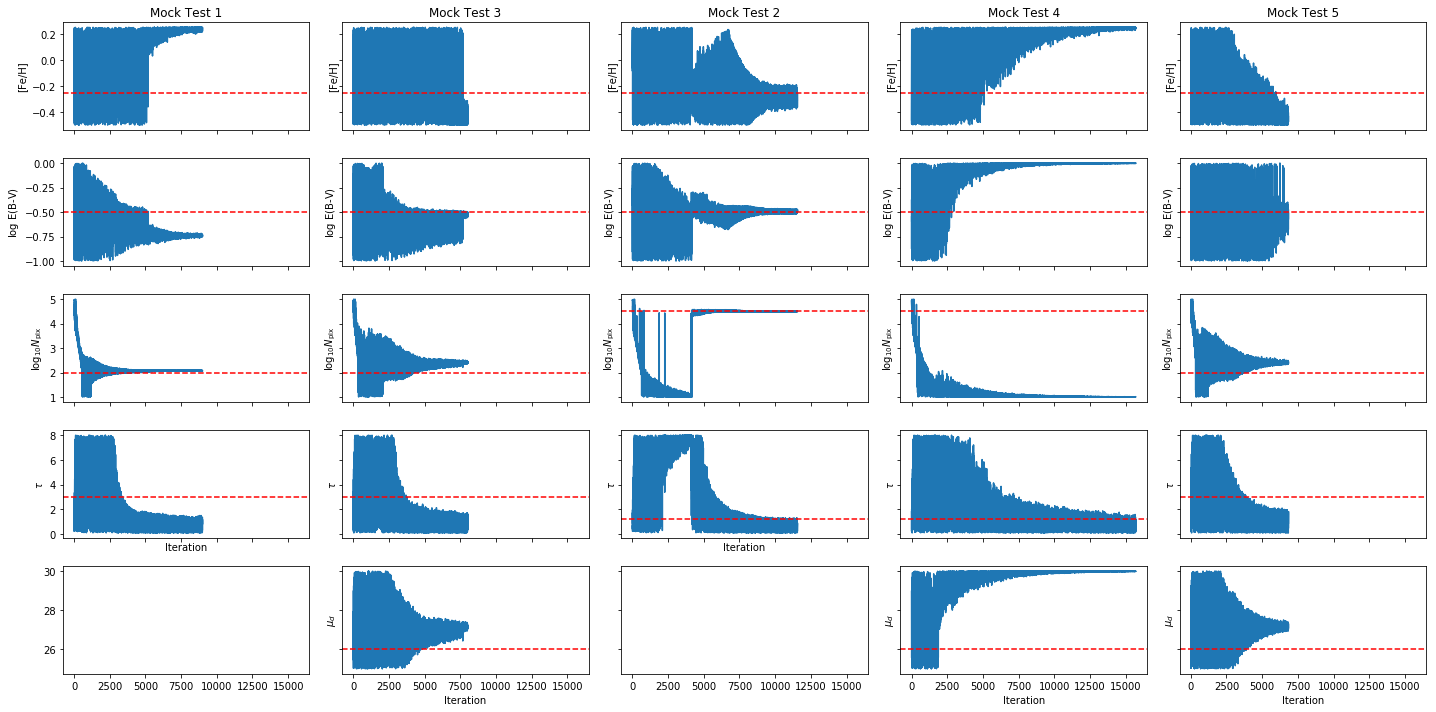

In [13]:
fig, axes = plot_sets(['mock_1', 'mock_3', 'mock_2', 'mock_4', 'mock_5'], chains_only=True);

In [10]:
res['mock_1'].best_params

array([ 0.2449 , -0.74503,  2.0732 ,  0.36779])

9


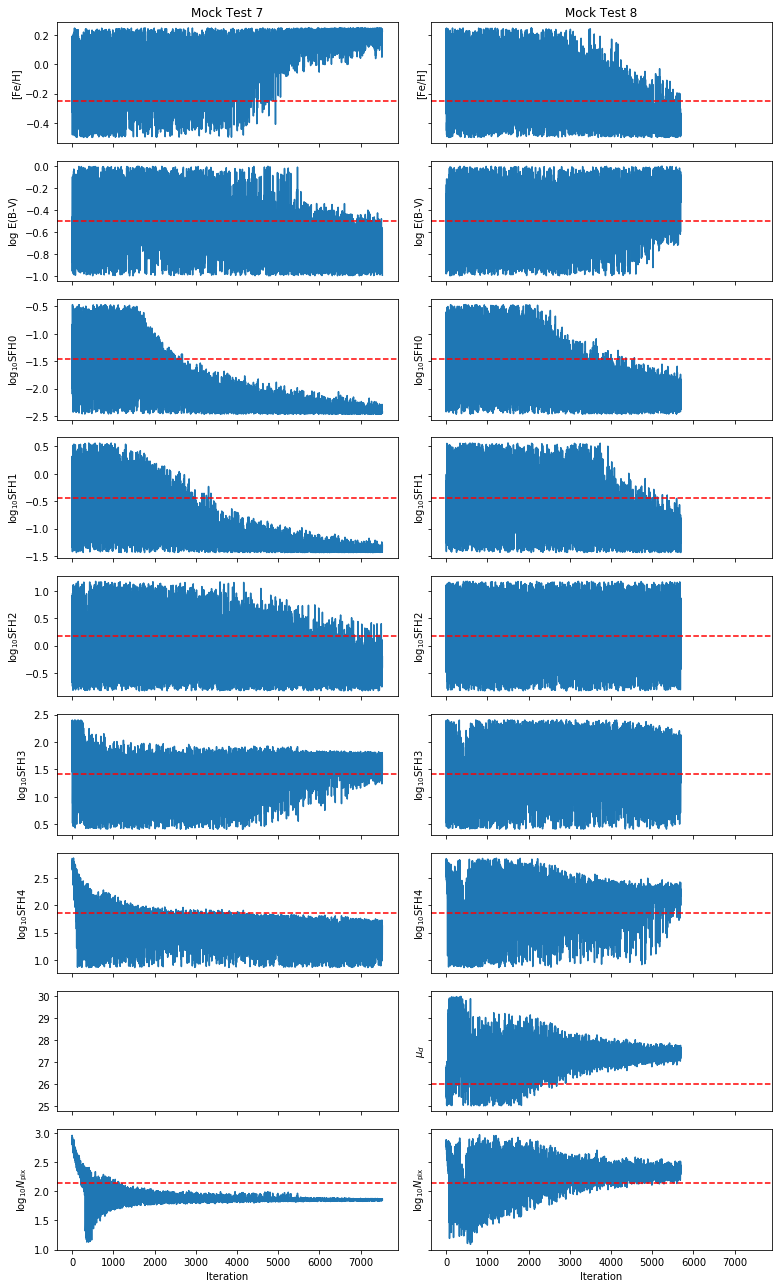

In [57]:
fig, axes = plot_sets(['mock_7', 'mock_8'], chains_only=True);